## Class 1

---
**Linear Regression**

linear regression is a statistical method used to estimate the relationship between a dependent variable and one or more independent variables by fitting a straight line to the data.

- It assumes that the target variable `Y` depends on the input variable `Xi` with a linear relationship.
- The target variable is also called the dependent variable.
- The input variables are also called the independent variables.
- If the there is only one independent variable - we call it simple linear regression.
    - In simple linear regression we get an equation of the form: `y = m*x + k`
    - Here `m` is the slope and `k` is the intercept for the line formed by the equation.
- If the there are more than one independent variables - we call it multiple linear regression.
    - In multiple linear regression we get an equation of the form: `y = m1*x1 + m2*x2 + m3*x3 + ... + k`
    - Here `m1`, `m2` and so on are called coefficients (or weights) of the independent variables
    - is the slope and `k` is the intercept (or bias) for the line formed by the equation.

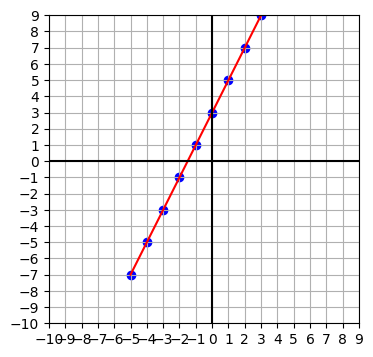

In [27]:
# linear equation visualizer

# A line on a 2D plane can be represented as y = mx + k, where m is the slope and k is the intercept. Where:
# m is the slope of the line - it defines how fast the y-value grows as the x-value increases
# k is the y-intercept of the line - it defines the y-value when the x-value is zero

import numpy as np
import matplotlib.pyplot as plt

# change the values of m and k to see how the line changes
m = 2   # slope
k = 3   # intercept

x = np.linspace(-5, 5, 11)  # numpy array of 10 x-values
y = m * x + k               # 10 y-values generated from the line equation

plt.figure(figsize=(4, 4))
plt.scatter(x, y, color='b')    # to plot the points
plt.plot(x, y, color='r')       # to plot the line

plt.axhline(0, color='black', linewidth=1.5) # to highlight the x-axis
plt.axvline(0, color='black', linewidth=1.5) # to highlight the y-axis
plt.grid(True)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xticks([xt for xt in range(-10, 10, 1)])
plt.yticks([yt for yt in range(-10, 10, 1)])
plt.show()

---
**Best Fit Line**

- In the above example, all the points are perfectly collinear - i.e. there exists a line which passes through all the points perfectly.
- but in practical cases data points may not always lie on a straight line. In that case we can't find a perfect fit line.
- In practical scenarios we often aim for a `best-fit-line` - i.e. a line such that its distance from the data points is as minimum as possible.
- See the next graph for example.

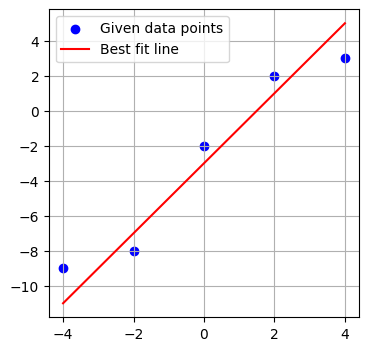

In [ ]:
# LinearRegression output
import matplotlib.pyplot as plt

x_points = np.array([-4, -2, 0, 2, 4])
y_points = np.array([-9, -8, -2, 2, 3])
y_line = [2*i-3 for i in x_points]

plt.figure(figsize=(4, 4))
# Scatter plot (e.g., real data)
plt.scatter(x_points, y_points, color='b', label='Given data points')
# Line plot (e.g., predicted line or function)
plt.plot(x_points, y_line, color='r', label='Best fit line')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

---
**Predicting ViewCount on a YouTube video using Simple Linear Regression**

- We can use Linear Regression to predict the view count on a Youtube video from its the subscriber count on the channel.
- Here we assume that the subscriber count is the independent variable (X)
- and the view count is the dependent variable (Y that depends on X)

In [1]:
# Dataset - data about YouTube channels
dataset = [
    {'channelName': 'Dream', 'SubscriberCount': 32500000, 'ViewCount': 650000},
    {'channelName': 'Alan Becker', 'SubscriberCount': 30700000, 'ViewCount': 650000},
    {'channelName': 'Vsauce', 'SubscriberCount': 24100000, 'ViewCount': 850000},
    {'channelName': 'Marvel Studios', 'SubscriberCount': 21500000, 'ViewCount': 326000},
    {'channelName': 'Veritasium', 'SubscriberCount': 17800000, 'ViewCount': 400000},
    {'channelName': 'Physics Wallah', 'SubscriberCount': 13600000, 'ViewCount': 440000},
    {'channelName': '3Blue1Brown', 'SubscriberCount': 7260000, 'ViewCount': 300000},
    {'channelName': 'Pokemon YT', 'SubscriberCount': 6390000, 'ViewCount': 55000},
    {'channelName': 'MinuteEarth', 'SubscriberCount': 3120000, 'ViewCount': 440000},
    {'channelName': 'BlackPenRedPen', 'SubscriberCount': 1370000, 'ViewCount': 34000},
]

Lets plot an X-Y graph for this dataset

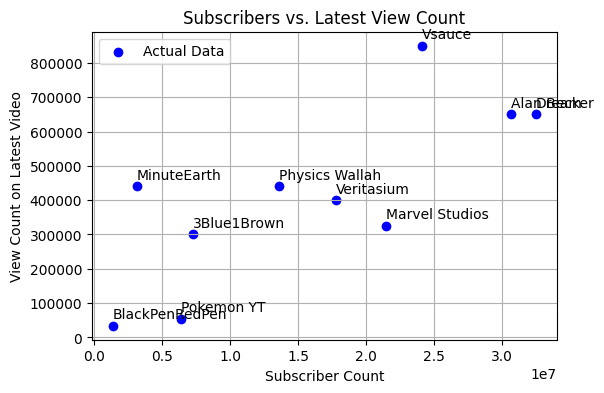

In [2]:
import matplotlib.pyplot as plt

# Extract input and output arrays
n = len(dataset)
X = [d['SubscriberCount'] for d in dataset]
Y = [d['ViewCount'] for d in dataset]
names = [d['channelName'] for d in dataset]

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.title("Subscribers vs. Latest View Count")
plt.xlabel("Subscriber Count")
plt.ylabel("View Count on Latest Video")
for index in range(n):
    plt.text(X[index], Y[index]+20000, names[index])
plt.grid(True)
plt.legend()
plt.show()

---
**Observation**

From this graph we can see that the general trend says that increasing the no of subs also increases no of views. Which means this is a good dataset to implement Linear Regression on.

---
**Implementing Simple Linear Regression**

To implement a simple (or even multiple) linear regression model we can use scikit-learn library in python. This library provides an easy to use interface for training a model, finding weights and making predictions.

- `from sklearn.linear_model import LinearRegression`
    - sklearn.linear_model is the Library
    - LinearRegression is a Class
- `model = LinearRegression()`
    - model is an object of type LinearRegression
- `model.fit(X, Y)`
    - .fit method is used to find the best-fit-line for given datapoints
    - X is a sequence containing x-coordinates of datapoints dimension = 2, shape = (n, 2)
    - Y is a sequence containing y-coordinates of datapoints dimension = 1, shape = (n,)
- `m = model.coef_[0]`
    - .coef_ is the list of coeeficients
    - in simple linear regression we only use the first value
- `k = model.intercept_`
    - .intercept_ is the intercept value
- `model.predict(X)`
    - returns a list of predicted y-values for a given list of x-values

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Arrays for dependent and independent variables
Y = np.array(Y)                 # 1D array of shape (n,)
X = np.array(X).reshape(-1, 1)  # 2D array of shape (n, 1)

In [ ]:
# Train Linear Regression Model
model = LinearRegression()      # model is an object of LinearRegression class
model.fit(X, Y)                 # fit method is used to train the model

# Display the linear equation
m = model.coef_[0]              # slope value
k = model.intercept_            # intercept value

print(f"Linear Regression Equation: Y = {m:.2f} * X + {k:.2f}")

Linear Regression Equation: Y = 0.02 * X + 137169.49


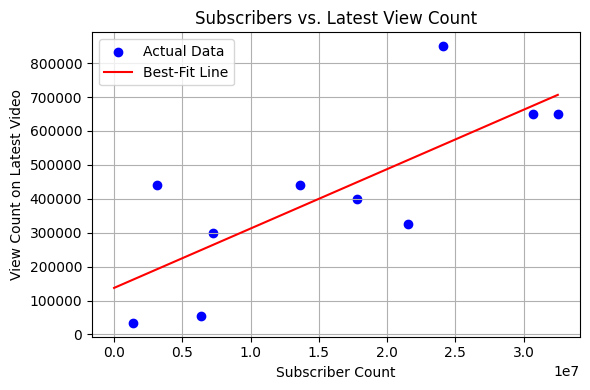

In [ ]:
# Create prediction line
x_range = np.linspace(0, X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(x_range, y_pred, color='red', label='Best-Fit Line')
plt.title("Subscribers vs. Latest View Count")
plt.xlabel("Subscriber Count")
plt.ylabel("View Count on Latest Video")
plt.grid(True)
plt.legend()
plt.show()

Given Subscriber Count: 12000000
Predicted View Count  : 347347


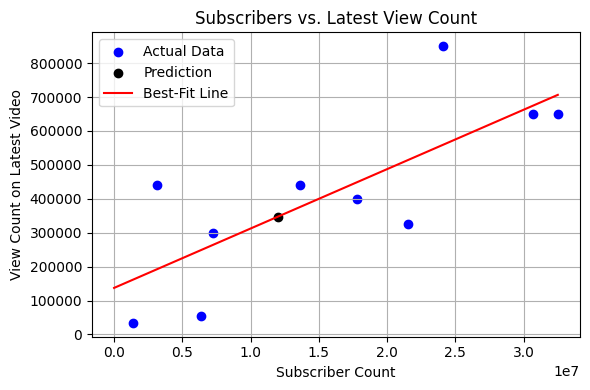

In [ ]:
# Predict view count for given sub count
import numpy as np

sub_count = int(input("Enter Subscriber Count: "))

input_array = np.array([[sub_count]])
predicted_views = model.predict(input_array)
view_count = predicted_views[0]

print(f"Given Subscriber Count: {int(sub_count)}")
print(f"Predicted View Count  : {int(view_count)}")

# Create prediction line
x_range = np.linspace(0, max(X.max(), sub_count), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.scatter([sub_count], [view_count], color='black', label='Prediction')
plt.plot(x_range, y_pred, color='red', label='Best-Fit Line')
plt.title("Subscribers vs. Latest View Count")
plt.xlabel("Subscriber Count")
plt.ylabel("View Count on Latest Video")
plt.grid(True)
plt.legend()
plt.show()


---
**Conclusion**

We have successfully implemented a simple linear regression model to predict the number of views on a youtube video given the channels subscribers count.

example:
- subcribers count = 12,000,000
- predicted view count = 347,347
